# Very Short Introduction of AC (Alternative Current) Power
&copy; S. Harada 2021


## Review of High School Physics
### DC (Direct Current) Power
#### Definition
DC electric power is calculate by

$$
P=V I
$$

where $P$ is (consumed or generated) electric power in Watts (W), $V$ is DC voltage in Volts (V), and $I$ is DC current in Ampere (A).

#### Electric power for the constant voltage and constant current conditions

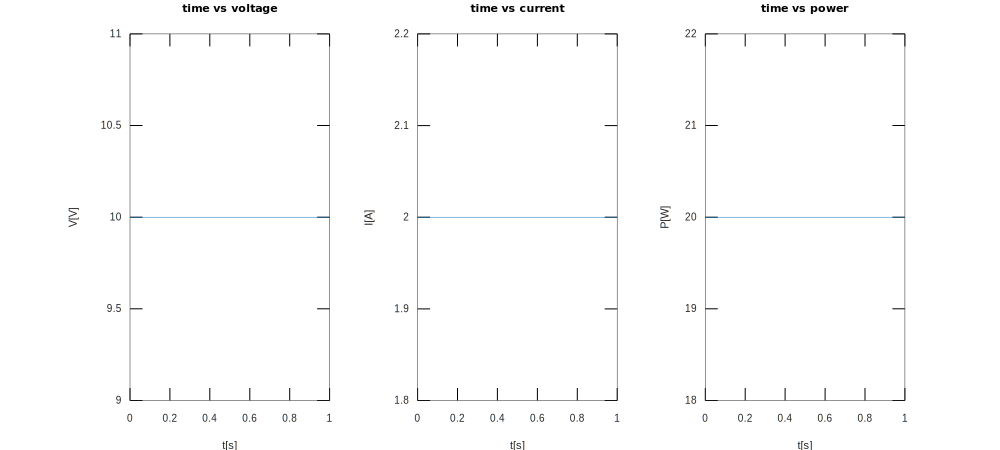

In [1]:
V=@(t) 10*ones(size(t)); % 10V for any time
I=@(t) 2*ones(size(t));  % 2A for any time
t=linspace(0,1,101); %  0 to 1 second 
h=figure();
position=get(h,"position");
set(h,"position",[0 0 1000 450]); % adjust to your preferences
subplot(1,3,1);
    plot(t,V(t));
    xlabel("t[s]");ylabel("V[V]");
    title("time vs voltage");
subplot(1,3,2);
    plot(t,I(t));
    xlabel("t[s]");ylabel("I[A]");
    title("time vs current");
subplot(1,3,3);
    P=V(t).*I(t);
    plot(t,P);
    xlabel("t[s]");ylabel("P[W]");
    title("time vs power");

### AC Voltage and Current for Resistor $R$, Inductor (or Coil) $L$ and Capacitor (or Condenser) $C$
Assumption : $v(t)=V_m\sin(\omega t)$ and steady state

$$
\begin{eqnarray*}
i(t)&=&\frac{V_m\sin(\omega t)}{R}\\
i(t)&=&\frac{V_m\sin(\omega t-\pi/2)}{\omega L}\\
i(t)&=& (\omega C)V_m\sin(\omega t+\pi/2)
\end{eqnarray*}
$$

R = 5


L = 0.010000


C = 5.0000e-04


Vm = 10


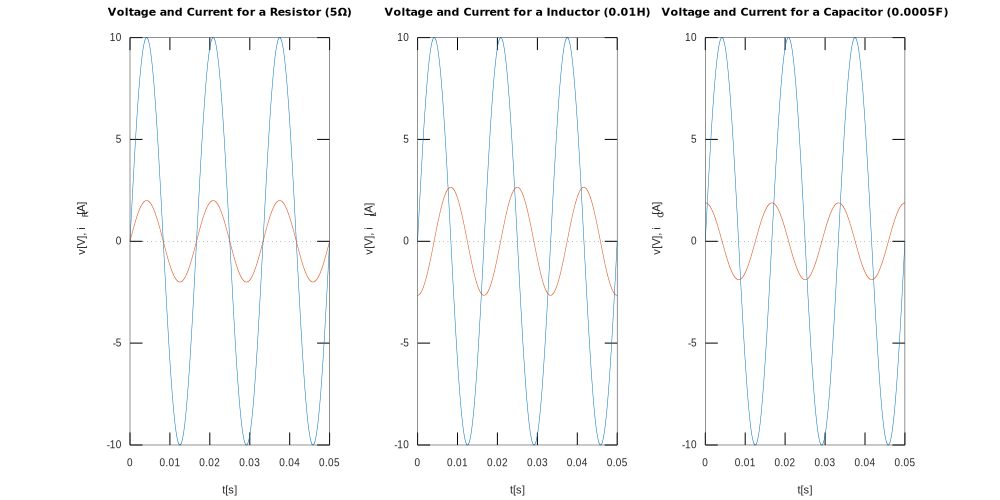

In [2]:
omega = 2*pi*60; % angular frequency corresponding to 60Hz
R=5 % 5 Ohm
L=0.01 % 0.01 H
C=0.0005 % 0.0005 F = 5 mF
Vm = 10
v=@(t) Vm*sin(omega*t); %
iR=@(t) v(t)/R;  % 
iL=@(t) v(t-pi/2)/(omega*L);  % 
iC=@(t) omega*C*v(t+pi/2);  % 

t=linspace(0,0.05,10001); % 
h=figure();
position=get(h,"position");
set(h,"position",[0 0 1000 500]); % adjust to your preferences
subplot(1,3,1);
    plot(t,v(t));
    hold on;
    plot(t,iR(t));
    line([0 0.05],[0,0],'color','black','linestyle',':');
    xlabel("t[s]");ylabel("v[V], i_R[A]");
    title(sprintf("Voltage and Current for a Resistor (%gΩ)",R));
subplot(1,3,2);
    plot(t,v(t));
    hold on;
    plot(t,iL(t));
    line([0 0.05],[0,0],'color','black','linestyle',':');
    xlabel("t[s]");ylabel("v[V], i_L[A]");
    title(sprintf("Voltage and Current for a Inductor (%gH)",L));
subplot(1,3,3);
    plot(t,v(t));
    hold on;
    plot(t,iC(t));
    line([0 0.05],[0,0],'color','black','linestyle',':');
    xlabel("t[s]");ylabel("v[V], i_C[A]");
    title(sprintf("Voltage and Current for a Capacitor (%gF)",C));

## AC Power
### Instantaneous Power consumed at Resistor, Inductor and Capacitor
Instantaneous power is defined by

$$
p(t)=v(t)i(t)
$$

R = 5


L = 0.010000


C = 5.0000e-04


Vm = 10


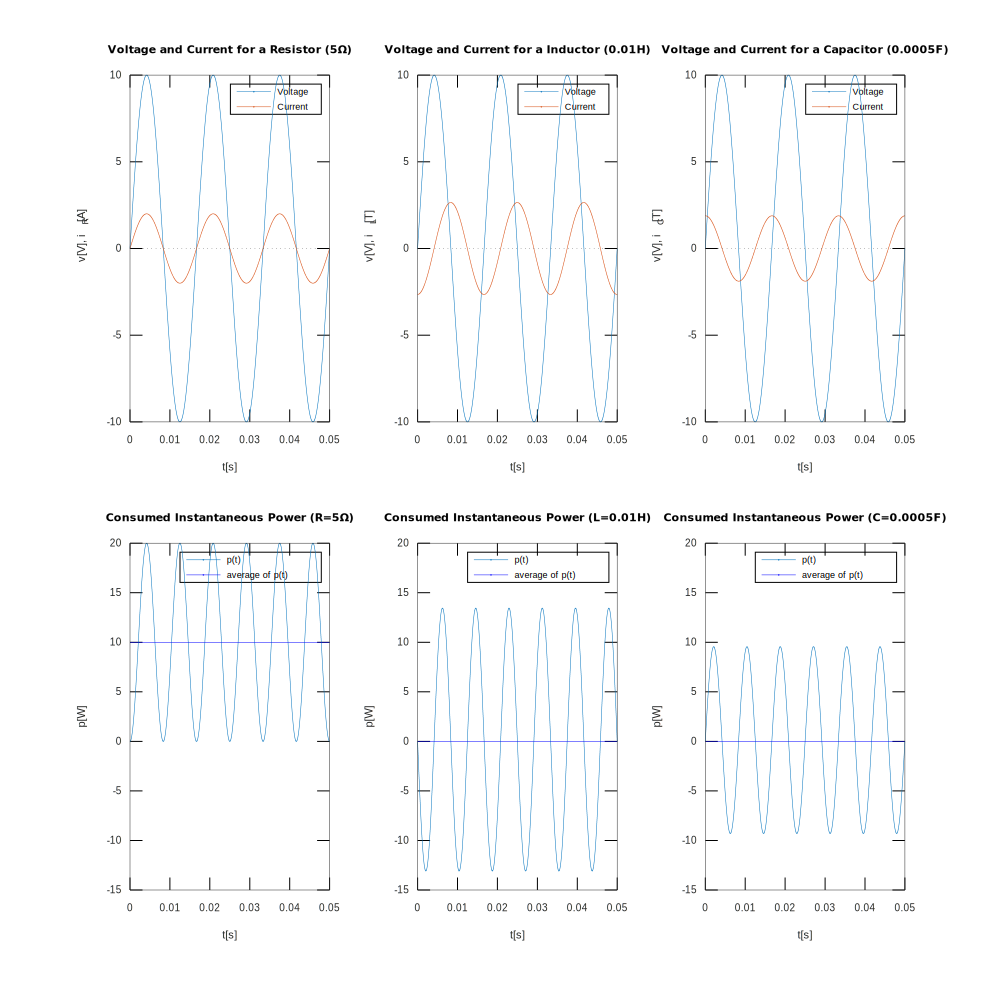

In [3]:
omega = 2*pi*60; % angular frequency corresponding to 60Hz
R=5 % 5 Ohm
L=0.01 % 0.01 H
C=0.0005 % 0.0005 F = 5 mF
Vm = 10
v=@(t) Vm*sin(omega*t); % 
iR=@(t) v(t)/R;  % 
iL=@(t) v(t-pi/2)/(omega*L);  % 
iC=@(t) omega*C*v(t+pi/2);  % 

t=linspace(0,0.05,10001); %  0 to 0.05 second 
h=figure();
position=get(h,"position");
set(h,"position",[0 0 1000 1000]); % adjust to your preferences
subplot(2,3,1);
    plot(t,v(t));
    hold on;
    plot(t,iR(t));
    line([0 0.05],[0,0],'color','black','linestyle',':');
    xlabel("t[s]");ylabel("v[V], i_R[A]");
    title(sprintf("Voltage and Current for a Resistor (%gΩ)",R));
    legend(["Voltage";"Current"]);
subplot(2,3,3+1);
    p=v(t).*iR(t);
    plot(t,p);
    % line([0 0.05],[0,0],'color','black','linestyle',':');
    line([0 0.05],[max(v(t))*max(iR(t))/2,max(v(t))*max(iR(t))/2],'color','blue','linestyle','-');
    xlabel("t[s]");ylabel("p[W]");
    title(sprintf("Consumed Instantaneous Power (R=%gΩ)",R));
    axis([0 0.05 -15 20]);
    legend(["p(t)";"average of p(t)"]);

subplot(2,3,2);
    plot(t,v(t));
    hold on;
    plot(t,iL(t));
    line([0 0.05],[0,0],'color','black','linestyle',':');
    xlabel("t[s]");ylabel("v[V], i_L[T]");
    title(sprintf("Voltage and Current for a Inductor (%gH)",L));
    legend(["Voltage";"Current"]);

subplot(2,3,3+2);
    p=v(t).*iL(t);
    plot(t,p);
    % line([0 0.05],[0,0],'color','black','linestyle',':');
    line([0 0.05],[0,0],'color','blue','linestyle','-');
    xlabel("t[s]");ylabel("p[W]");
    title(sprintf("Consumed Instantaneous Power (L=%gH)",L));
    axis([0 0.05 -15 20])
    legend(["p(t)";"average of p(t)"]);


subplot(2,3,3);
    plot(t,v(t));
    hold on;
    plot(t,iC(t));
    line([0 0.05],[0,0],'color','black','linestyle',':');
    xlabel("t[s]");ylabel("v[V], i_C[T]");
    title(sprintf("Voltage and Current for a Capacitor (%gF)",C));
    legend(["Voltage";"Current"]);

subplot(2,3,3+3);
    p=v(t).*iC(t);
    plot(t,p);
    % line([0 0.05],[0,0],'color','black','linestyle',':');
    line([0 0.05],[0,0],'color','blue','linestyle','-');
    xlabel("t[s]");ylabel("p[W]");
    title(sprintf("Consumed Instantaneous Power (C=%gF)",C));
    axis([0 0.05 -15 20])
    legend(["p(t)";"average of p(t)"]);

###  Instantaneous Power to Active Power (or Real Power)

Instantaneous voltage and current:

$$
\begin{eqnarray*}
v(t)&=& V_m\sin(\omega t)\\
i(t)&=& I_m\sin(\omega t + \phi)
\end{eqnarray*}
$$

Instantaneous power:

$$
\begin{eqnarray*}
p(t)=v(t)i(t)&=& V_m\sin(\omega t) I_m\sin(\omega t + \phi)\\
&=& V_mI_m \sin(\omega t) \sin(\omega t + \phi)\\
&=& \frac{V_mI_m}{2} \left(\cos\phi -\cos(2\omega t +\phi)\right)
\end{eqnarray*}
$$

Active Power is defined as the average of instance power:

$$
\begin{eqnarray*}
P&=&\frac{V_m I_m}{2}\cos\phi\\
&=& V I \cos\phi
\end{eqnarray*}
$$
where $V=V_m/\sqrt{2}$ and $I=I_m/\sqrt{2}$ (root mean square value of voltage and current).

Note that oscillation term $\cos(2\omega t +\phi)$ of active power is canceled if we use balanced three phase AC circuit (that is the case in most electrical power systems but beyond the range of this very short introduction).

### Apparent Power and Reactive Power

Apparent Power:

$$
S=V I
$$

Reactive Power:

$$
Q=V I \sin(\phi)
$$

or

$$
Q=V I \sin(-\phi)
$$

In electrical power system analysis we prefer the latter definition where inductors are considered to consume reactive power.

Although only the active power is consumed for work, apparent power and reactive power are important quantities to operate electric power systems under various practical constraints.


Electrical power when $V$[V] (rms value) is applied to each element:

| Element| $\phi$ | Apparent Power [VA] | Active Power [W] | Reactive Power [Var] |
|---------|-------|---------------------|------------------|----------------------|
| $R$     | $0$    | $V\cdot\frac{V}{R}=\frac{V^2}{R}$ |   $V\cdot\frac{V}{R}\cos 0=\frac{V^2}{R}$     | $V\cdot\frac{V}{R}\sin 0=0 $ |  
| $L$     | $-\pi/2$| $V\cdot\frac{V}{\omega L}=\frac{V^2}{\omega L}$ |   $V\cdot\frac{V}{\omega L}\cos(-\pi/2)=0$     | $V\cdot\frac{V}{\omega L}\sin(\pi/2)=\frac{V^2}{\omega L}$ |  
| $C$     | $\pi/2$    | $V\cdot\omega C V=\omega C V^2$ |   $V\cdot\omega C V\cos(\pi/2)=0$     | $V\cdot\omega C V\sin(-\pi/2)=-\omega C V^2$ |

### Complex Representation of Voltage, Current and Power

Complex Voltage and Current:

$$
\begin{eqnarray*}
v(t)=V_m\sin(\omega t) &\rightarrow & \dot{V}=V\exp(j0)=V\angle 0 \\ 
i(t)= I_m\sin(\omega t + \phi)  &\rightarrow & \dot{I}=I\exp(j\phi)=I\angle \phi
\end{eqnarray*}
$$

where $V=V_m/\sqrt{2}$ and $I=I_m/\sqrt{2}$.

Apparent Power:

$$
S=V I =|\dot{V}\dot{I}|
$$

Complex Power:

$$
\begin{eqnarray*}
\dot{S}&=&\dot{V}\dot{I}^*\\
&=&V I \exp(-j\phi)\\
&=&VI\cos(-\phi)+jVI\sin(-\phi)\\
&=&VI\cos(\phi)+jVI\sin(-\phi)
\end{eqnarray*}
$$

where $^*$ means complex conjugate, i.e. $\dot{I}^*=I\exp(-j\phi)$.

Active Power and Reactive Power

$$
\begin{eqnarray*}
P&=&\Re(\dot{S})\\
Q&=&\Im(\dot{S})
\end{eqnarray*}
$$

where $\Re$ and $\Im$ mean real and imaginary part of complex number respectively.

Complex Current for Resistor $R$, Inductor $L$ and Capacitor $C$:

$$
\begin{eqnarray*}
\dot{I}&=& \frac{\dot{V}}{R}\\
\dot{I}&=& \frac{\dot{V}}{j\omega L}\\
\dot{I}&=& j\omega C \dot{V}
\end{eqnarray*}
$$

where $\omega$ is angular frequency and $j=\sqrt{-1}$. In electrical engineering we use $j$ as the imaginary unit because we often use $i$ for current variables.

For a general complex impedance $\dot{Z}$, augmented Ohm's law holds:

$$
\dot{I}=\frac{\dot{V}}{\dot{Z}}
$$

| Circuit | Impedance $\dot{Z}$ &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp; &nbsp; &nbsp;  |
|---------|---------------------|
|  $R$      | $R$               |
|  $L$     | $j\omega L$        |
|  $C$     | $\frac{1}{j\omega C}$ |
| $R$-$L$ Series Circuit | $R+j\omega L$ |
| $R$-$C$ Series Circuit | $R+\frac{1}{j\omega C}$ |
| $L$-$C$ Series Circuit | $j\omega L+\frac{1}{j\omega C}=j\frac{\omega^2 LC-1}{\omega C}$ |
| $R$-$L$-$C$ Series Circuit | $R+j\omega L+\frac{1}{j\omega C} = R+j\frac{\omega^2 LC-1}{\omega C}$ |
| $R$-$L$ Parallel Circuit | $\frac{j\omega R}{R+j\omega L}$ |
| $R$-$C$ Parallel Circuit | $\frac{\frac{R}{j\omega C}}{R+\frac{1}{j\omega C}}=\frac{R}{1+j\omega C R}$ |

We plot various quantities for an RLC series circuit.

In [4]:
function h=draw_arrow(xy_from,xy_to,darrow,style)
   X=[xy_from(1),xy_to(1)];
    Y=[xy_from(2),xy_to(2)];
    delta_xy=xy_to-xy_from;
    costh=delta_xy(1)/norm(delta_xy);
    sinth=delta_xy(2)/norm(delta_xy);
    R=[costh -sinth;sinth costh];
    xy_top=[norm(delta_xy),0];
    xy_fromp=[0,0];
    xy_topr=xy_top*R';
    xy_frompr=xy_fromp*R';
    xy_mid=(xy_to+xy_from)/2;

    Xr=[xy_from(1)+xy_frompr(1),xy_from(1)+xy_topr(1)];
    Yr=[xy_from(2)+xy_frompr(2),xy_from(2)+xy_topr(2)];

    xy_arrow1=[norm(delta_xy)-darrow*cos(15/180*pi),darrow*sin(15/180*pi)];
    xy_arrow2=[norm(delta_xy)-darrow*cos(15/180*pi),-darrow*sin(15/180*pi)];
    xy_arrow1r=xy_arrow1*R';
    xy_arrow2r=xy_arrow2*R';
    xy_arrow1r=xy_arrow1r+xy_from;
    Xr_arrow1=[xy_to(1),xy_arrow1r(1)];
    Yr_arrow1=[xy_to(2),xy_arrow1r(2)];
    xy_arrow2r=xy_arrow2r+xy_from;
    Xr_arrow2=[xy_to(1),xy_arrow2r(1)];
    Yr_arrow2=[xy_to(2),xy_arrow2r(2)];


   h0=line(Xr,Yr,style{1},style{2});
    %printf("draw (%g,%g)->(%g,%g)\n",Xr(1),Yr(1),Xr(2),Yr(2));
    hold on;
    h1=line(Xr_arrow1,Yr_arrow1,style{1},style{2});
    h2=line(Xr_arrow2,Yr_arrow2,style{1},style{2});
    %hold off;
    %axis([-1,1,-1,1]);
    %axis("square");
    h={h0,h1,h2};
endfunction

R = 2


L = 2.0000e-03


C = 5.0000e-03


Z =  2.0000 + 0.2235i


Vm = 10


V = 7.0711


phi = -0.1113


I = 3.5137


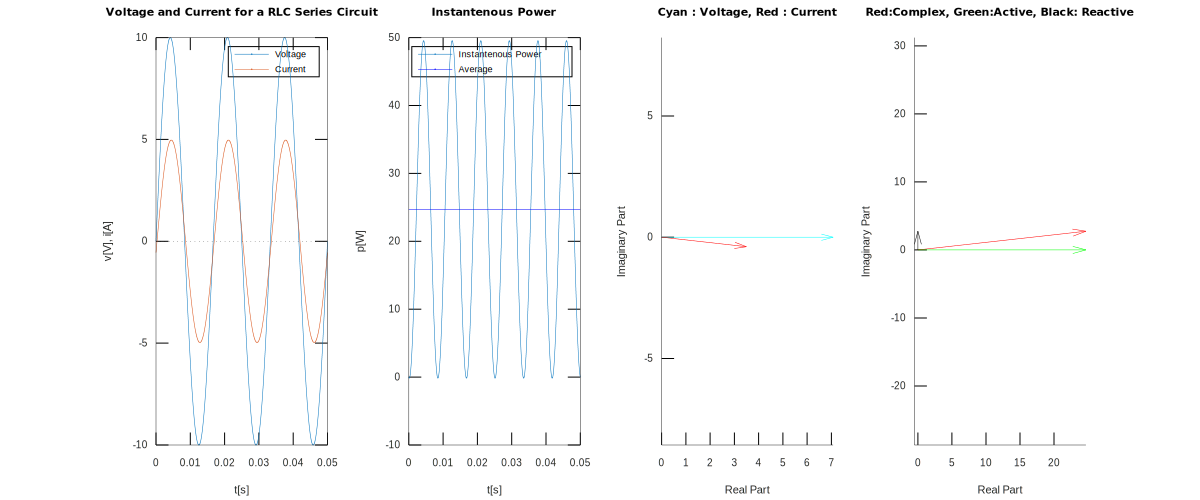

In [5]:
omega = 2*pi*60; % angular frequency corresponding to 60Hz
R=2 % 2 Ohm
L=0.002 % 0.002 H
C=5e-3 %  5mF
Z=R+j*omega*L+1/(j*omega*C) % Total  Impedance of the R-L-C Series Circuit
Vm = 10
V = Vm/sqrt(2)
phi=-angle(Z)
I=V/abs(Z)
v=@(t) Vm*sin(omega*t); % maximum amplitude 
i=@(t) Vm/abs(Z)*sin(omega*t+phi);  % 

t=linspace(0,0.05,10001); %  0 to 0.05 second 
h=figure();
position=get(h,"position");
set(h,"position",[0 0 1200 500]); % adjust to your preferences
subplot(1,4,1);
    plot(t,v(t));
    hold on;
    plot(t,i(t));
    line([0 0.05],[0,0],'color','black','linestyle',':');
    xlabel("t[s]");ylabel("v[V], i[A]");
    title(sprintf("Voltage and Current for a RLC Series Circuit"));
    legend(["Voltage";"Current"]);
subplot(1,4,2);
    p=v(t).*i(t);
    plot(t,p);
    hold on;
    xlabel("t[s]");ylabel("p[W]");
    title(sprintf("Instantenous Power"));
    line([0 0.05],[V*I*cos(phi) V*I*cos(phi)],'color','blue','linestyle','-');
    legend(["Instantenous Power";"Average"]);
subplot(1,4,3);
    h1=draw_arrow([0 0],[V 0],0.5,{'color','c'});
    h1=draw_arrow([0 0],[I*cos(phi) I*sin(phi)],0.5,{'color','r'});
    xlabel("Real Part");
    ylabel("Imaginary Part");
    axis("equal");
    title("Cyan : Voltage, Red : Current");
subplot(1,4,4);
    h1=draw_arrow([0 0],[V*I*cos(phi) V*I*sin(-phi)],2,{'color','r'});
    h2=draw_arrow([0 0],[V*I*cos(phi) 0],2,{'color','g'});
    h3=draw_arrow([0 0],[0 V*I*sin(-phi)],2,{'color','k'});
    hold on;
    xlabel("Real Part");
    ylabel("Imaginary Part");
    axis("equal");
    title("Red:Complex, Green:Active, Black: Reactive");